In [5]:
from pathlib import Path
import pandas as pd
import numpy as np

# Specify project paths
import os
import sys
PROJECT_ROOT_PATH = os.path.dirname(os.path.abspath(os.path.join(os.getcwd(), )))
print('PROJECT_ROOT_PATH',PROJECT_ROOT_PATH)
sys.path.append(PROJECT_ROOT_PATH)

PROJECT_ROOT_PATH C:\Users\urcha\repos\ds_toolbox\ds_toolbox


## Get Data

In [6]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['target'] = boston_dataset.target #MEDV
boston.head()

c:\users\urcha\repos\ds_toolbox\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df=boston.copy()

target_col='target'
# make list of numeric and string columns
numeric_cols = [] # could still have ordinal data
string_cols = []  # could have ordinal or nominal data

for col in df.columns:
    if col!=target_col:
        if (df.dtypes[col] == np.int64 or df.dtypes[col] == np.int32 or df.dtypes[col] == np.float64):
            numeric_cols.append(col)      # True integer or float columns

        if (df.dtypes[col] == object):  # Nominal and ordinal columns
            string_cols.append(col)

print('\n> Number of numerical features',len(numeric_cols),numeric_cols)
print('\n> Number of string features',len(string_cols),string_cols)


df = df[numeric_cols+[target_col]].dropna().copy()
df = df.reset_index(drop=True)

print('\n> Split in train/test')
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.33, random_state=0)

# break into X and y dataframes
X_train = df_train.reindex(columns=[x for x in df_train[numeric_cols].columns.values if x != target_col]).reset_index(drop=True)        # separate out X
y_train = df_train.reindex(columns=[target_col])   # separate out y
y_train=y_train.values.reshape(-1,1)
y_train = np.ravel(y_train)                     # flatten the y array

# break into X and y dataframes
X_test = df_test.reindex(columns=[x for x in df_test[numeric_cols].columns.values if x != target_col]).reset_index(drop=True)       # separate out X
y_test = df_test.reindex(columns=[target_col])   # separate out y
y_test=y_test.values.reshape(-1,1)
y_test = np.ravel(y_test)                     # flatten the y array

print('\n X,y review (TRAIN):',X_train.shape,y_train.shape)
print('\n X,y review (TEST):',X_test.shape,y_test.shape)


> Number of numerical features 13 ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

> Number of string features 0 []

> Split in train/test

 X,y review (TRAIN): (339, 13) (339,)

 X,y review (TEST): (167, 13) (167,)


In [8]:
data_train=X_train.copy()
data_train['target']=y_train

data_test=X_test.copy()
data_test['target']=y_test

## 1) Univariate plot

                                            Plots for CRIM                                            
                                           Train data plots                                           


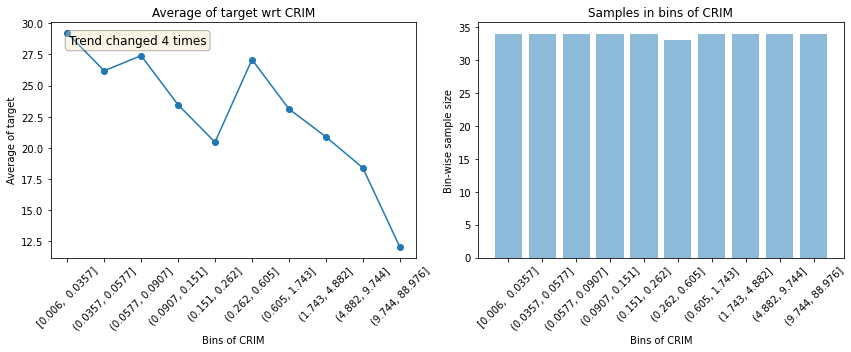

                                           Test data plots                                            


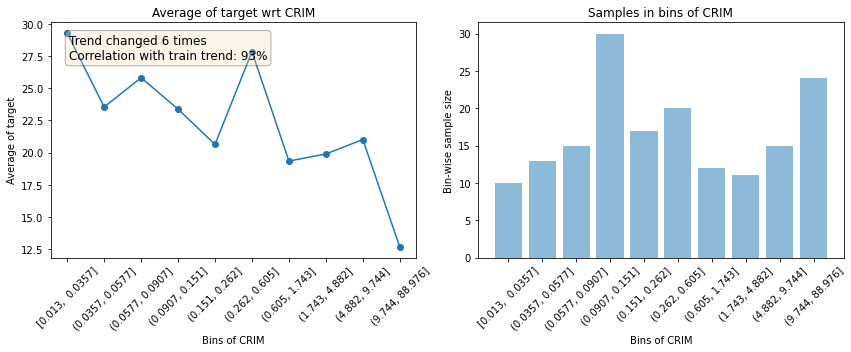



                                             Plots for ZN                                             
                                           Train data plots                                           


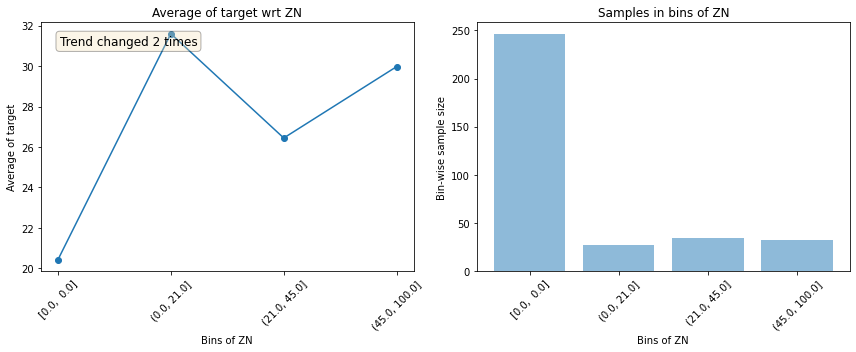

                                           Test data plots                                            


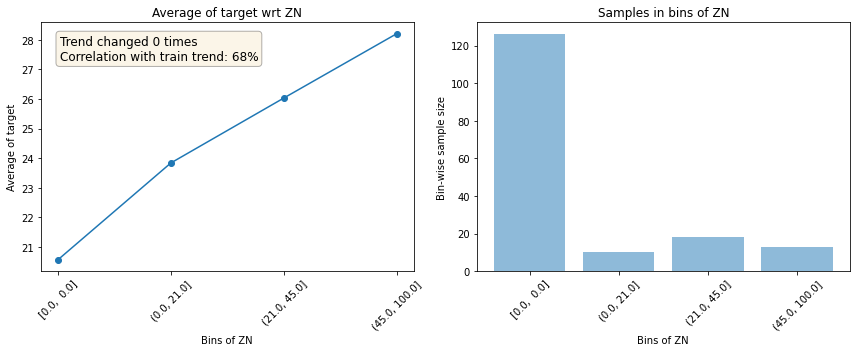



                                           Plots for INDUS                                            
                                           Train data plots                                           


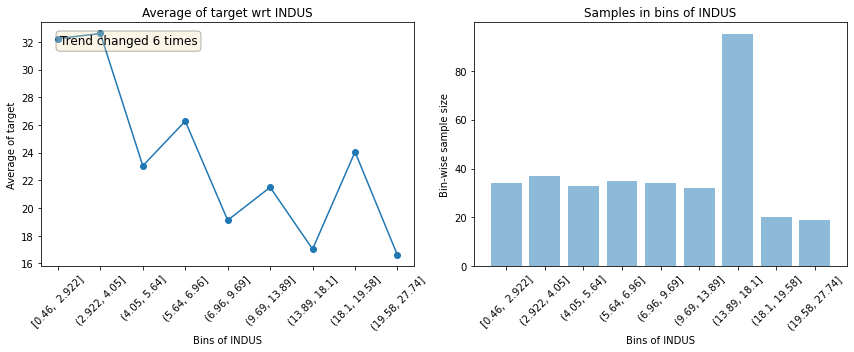

                                           Test data plots                                            


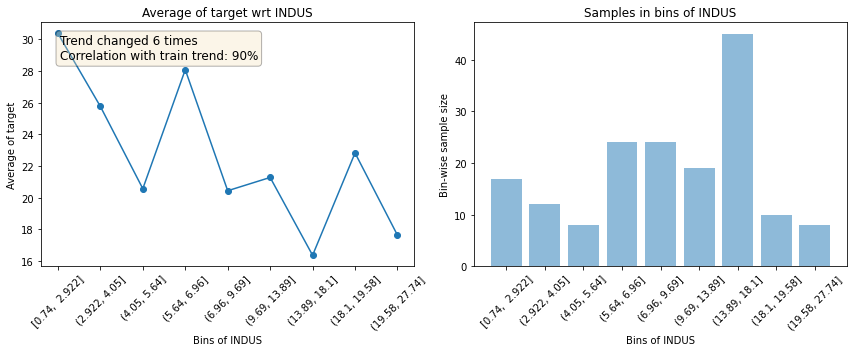



                                            Plots for CHAS                                            
                                           Train data plots                                           


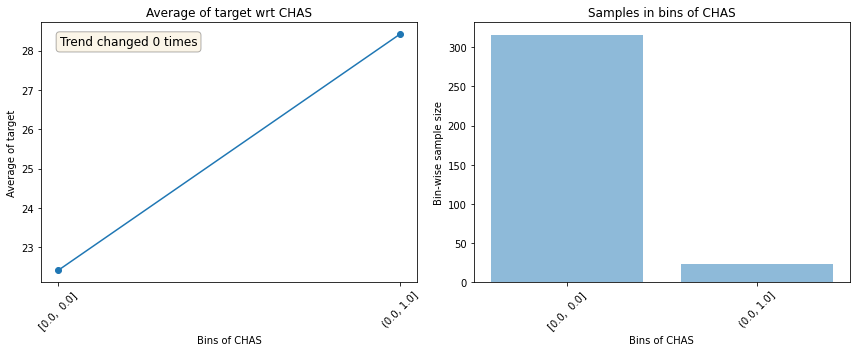

                                           Test data plots                                            


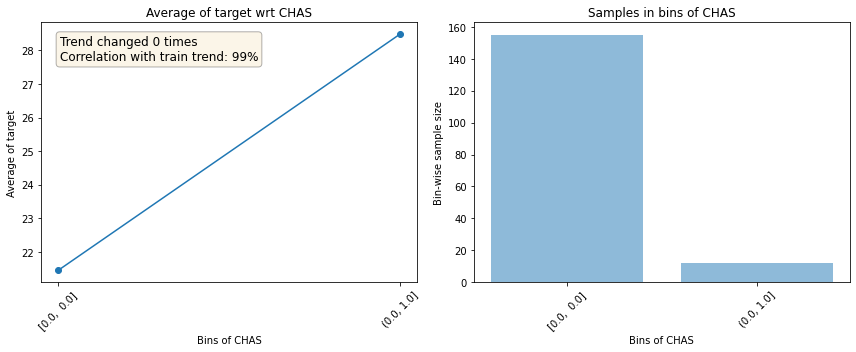



                                            Plots for NOX                                             
                                           Train data plots                                           


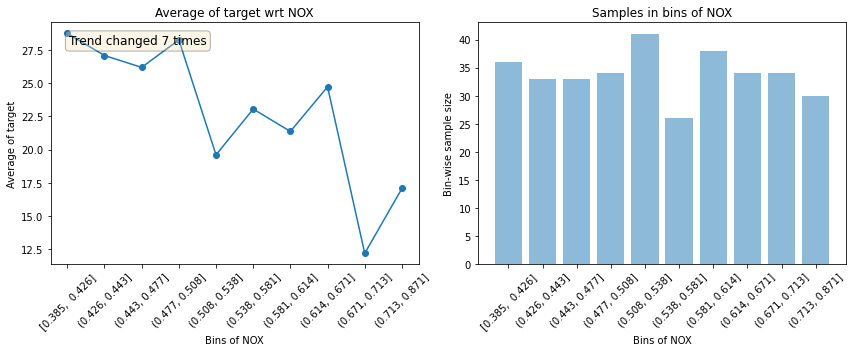

                                           Test data plots                                            


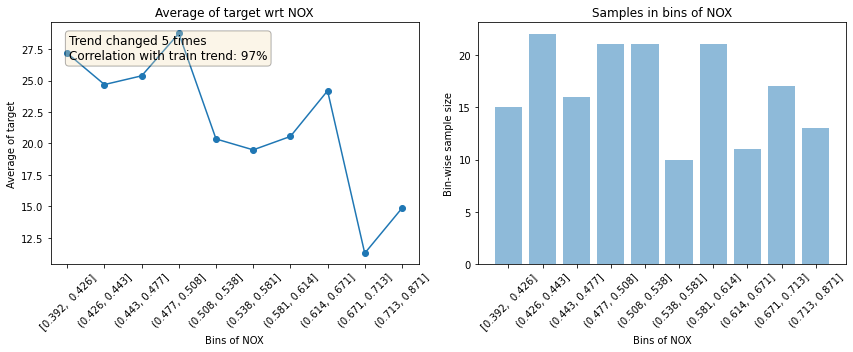



                                             Plots for RM                                             
                                           Train data plots                                           


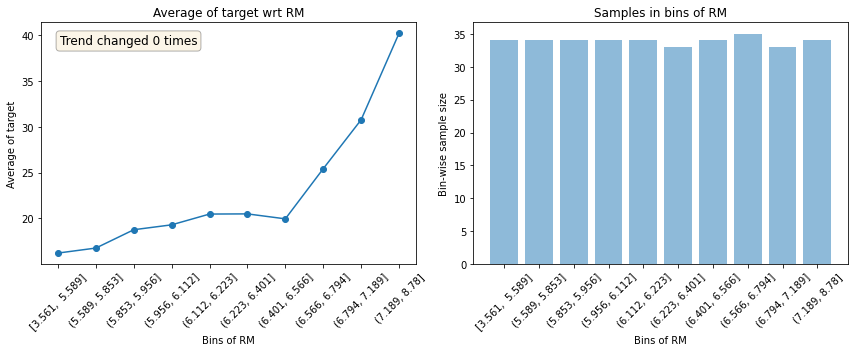

                                           Test data plots                                            


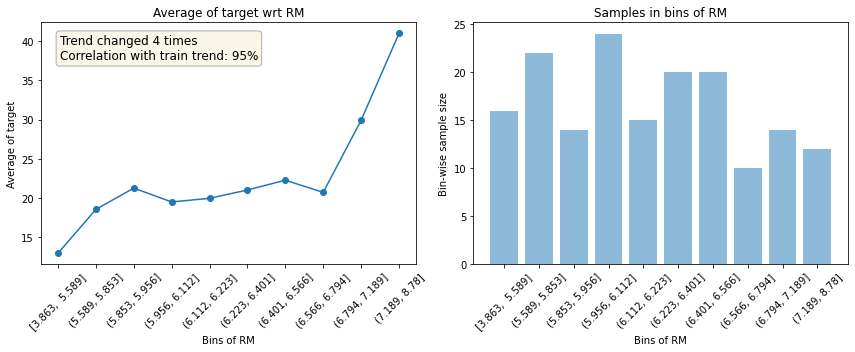



                                            Plots for AGE                                             
                                           Train data plots                                           


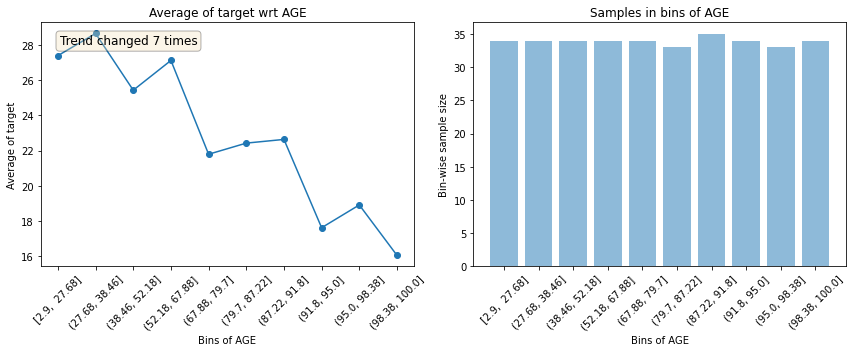

                                           Test data plots                                            


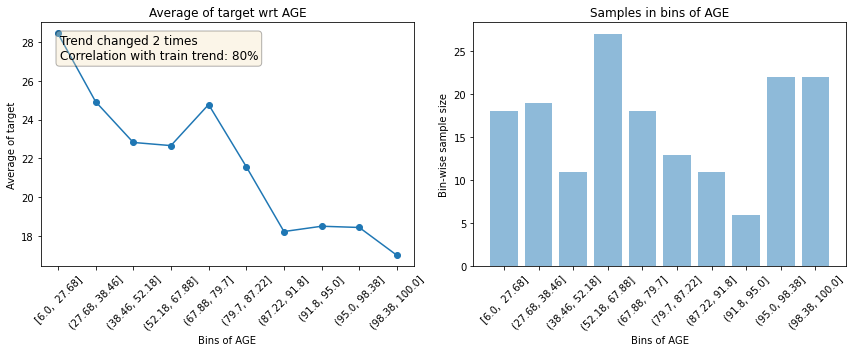



                                            Plots for DIS                                             
                                           Train data plots                                           


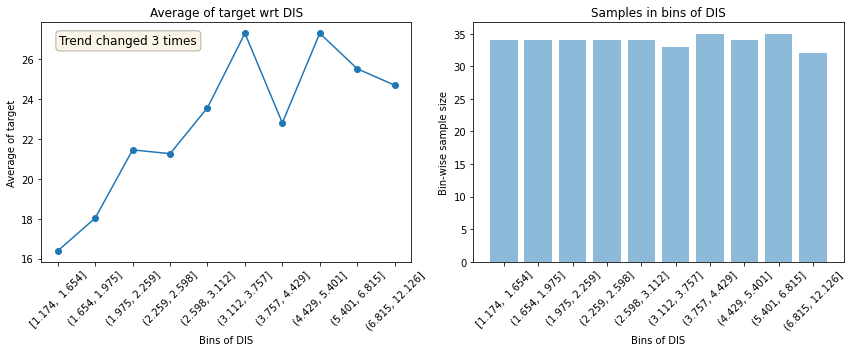

                                           Test data plots                                            


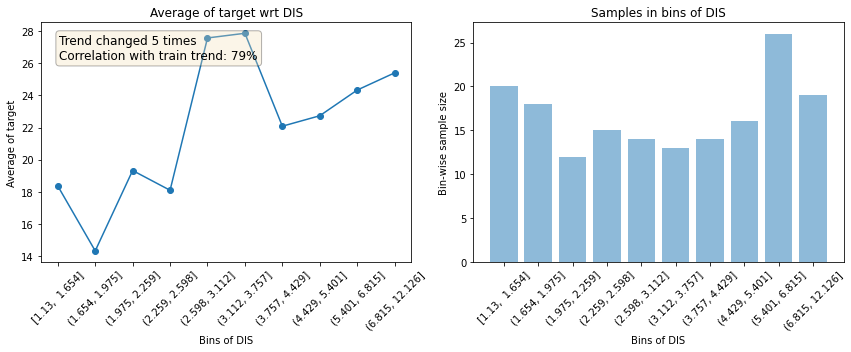



                                            Plots for RAD                                             
                                           Train data plots                                           


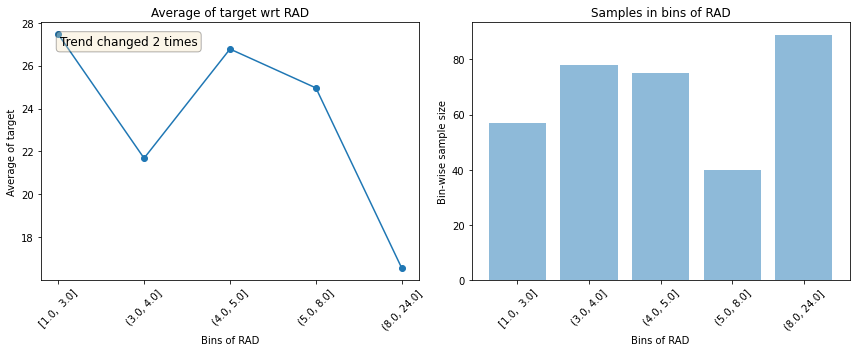

                                           Test data plots                                            


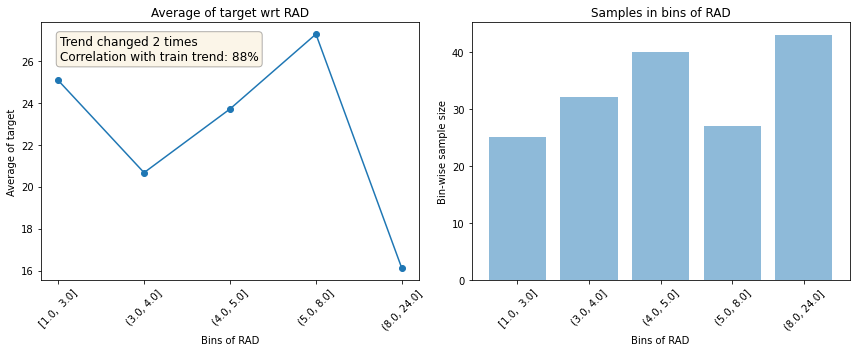



                                            Plots for TAX                                             
                                           Train data plots                                           


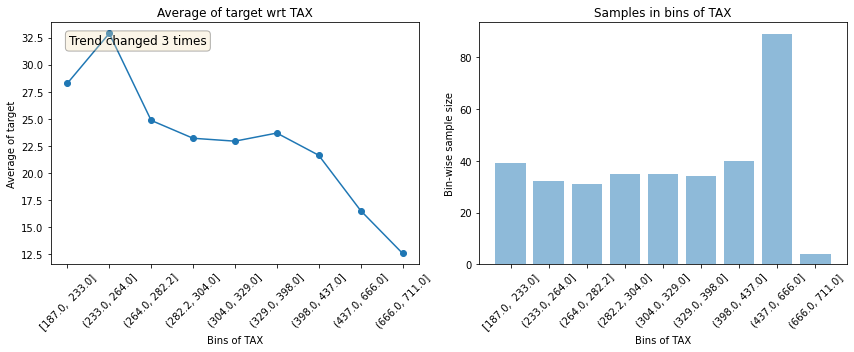

                                           Test data plots                                            


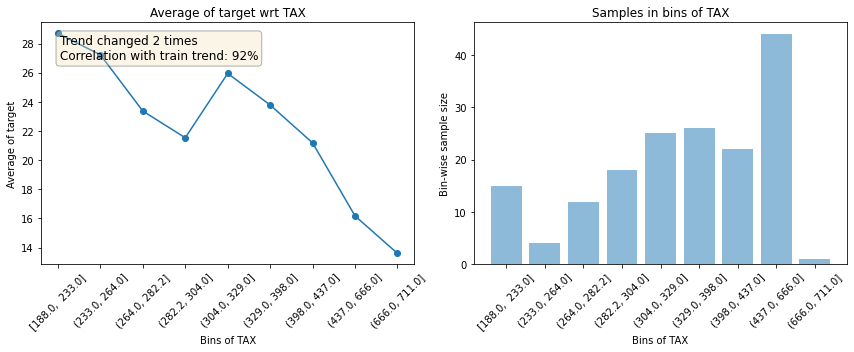



                                          Plots for PTRATIO                                           
                                           Train data plots                                           


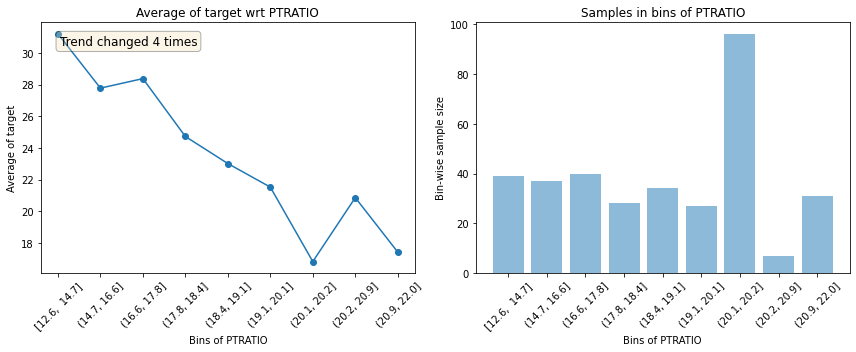

                                           Test data plots                                            


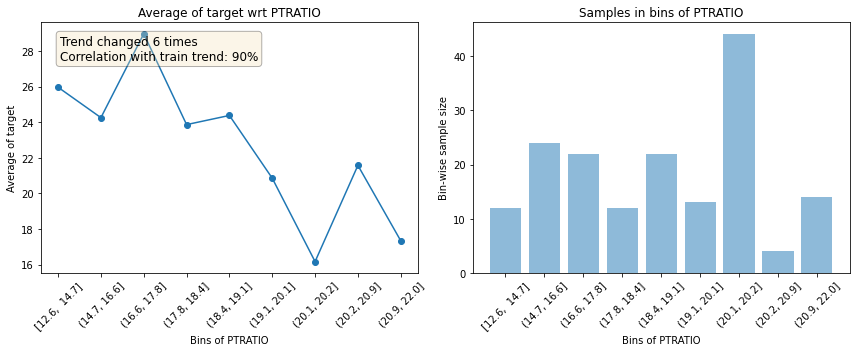



                                             Plots for B                                              
                                           Train data plots                                           


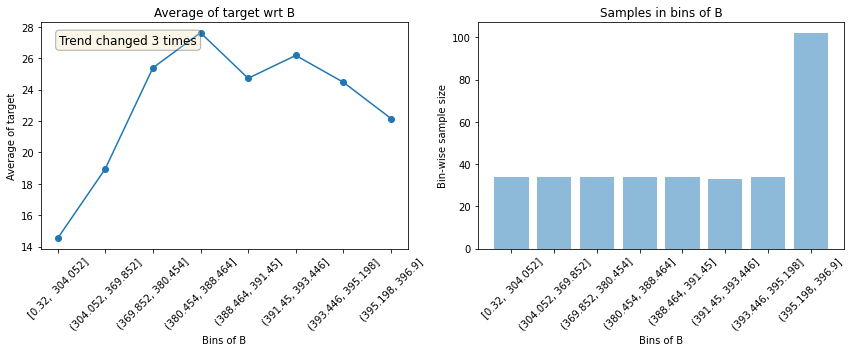

                                           Test data plots                                            


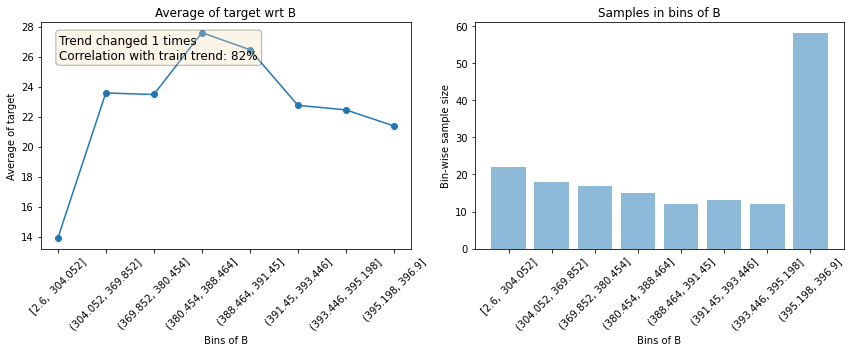



                                           Plots for LSTAT                                            
                                           Train data plots                                           


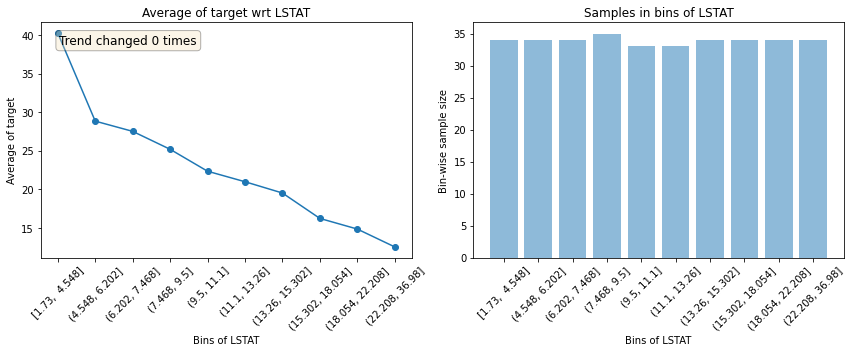

                                           Test data plots                                            


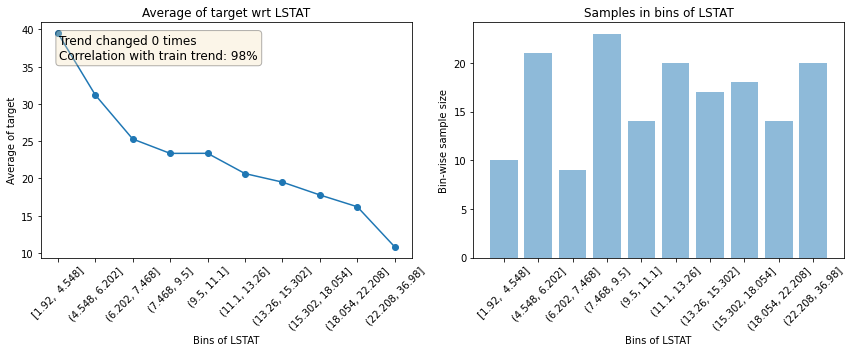

In [9]:
from imp import reload
import plotting
reload(plotting)
from plotting import get_univariate_plots

# plots univariate plots of first 10 columns in data_train
get_univariate_plots(data=data_train, 
                     target_col='target', 
                     features_list=numeric_cols, 
                     data_test=data_test)

## 2) Error plot

Create model

In [10]:
from sklearn.ensemble import RandomForestRegressor

est=RandomForestRegressor()

# CV predict
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(est,  X_train[numeric_cols], y_train, n_jobs=-1, verbose=0)



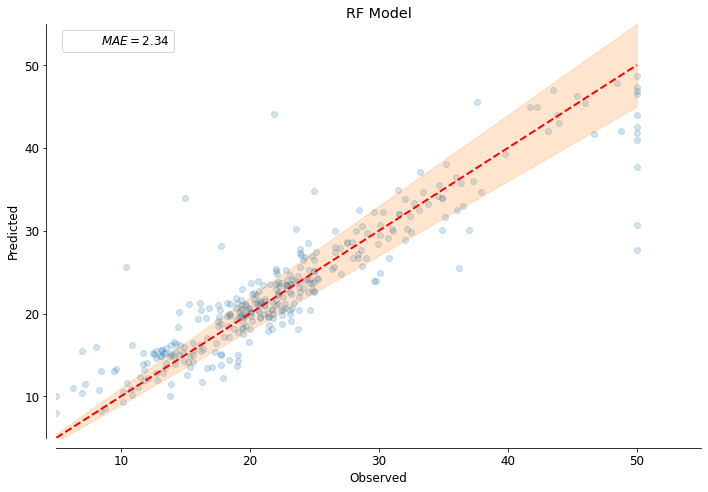

In [19]:
from imp import reload
import plotting
reload(plotting)
from plotting import plot_regression_results

mae=(np.abs(y_train - y_pred) ).mean(axis=0)
mae_text=(r'$MAE={:.2f}$').format(mae)

plot_regression_results(
        y_train, y_pred,
        title='RF Model',
        extra_text=mae_text)

## 3) ROC

create data

In [20]:
from sklearn import datasets, metrics, model_selection, svm
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=0)
clf = svm.SVC(random_state=0,probability=True
             )
clf.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [21]:
dataTrain=pd.DataFrame(X_train.copy())
dataTrain['target']=list(y_train)
dataTrain['predProba']=list(clf.predict_proba(X_train)[:,1])
print('dataTrain',dataTrain.shape)

dataTest=pd.DataFrame(X_test.copy())
dataTest['predProba']=list(clf.predict_proba(X_test)[:,1])
dataTest['target']=list(y_test)
print('dataTest',dataTest.shape)
dataTest.head()

dataTrain (75, 22)
dataTest (25, 22)


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,predProba,target
0,-0.161374,0.027510,-0.511040,0.856700,0.114032,1.367415,-0.104980,0.153644,-1.619360,-1.212868,...,-1.158203,2.232016,-1.584474,1.794449,0.844454,-0.443584,-0.282196,-1.655344,0.899617,1
1,0.082611,0.018922,0.539161,-1.537164,0.073171,1.013972,-0.957158,0.588742,0.100581,-1.005312,...,0.662074,-0.082034,0.384323,-0.821535,1.009712,1.105026,2.171165,-1.730276,0.082704,1
2,-0.014858,0.670570,-0.214167,0.250202,0.055489,-1.566995,0.039767,0.265688,1.849591,0.719984,...,0.019279,-0.707506,0.723100,0.821406,0.024612,-0.104862,-0.101697,-0.451303,0.844789,1
3,-1.334258,0.693773,-0.812993,-1.413636,-1.169407,1.077744,-0.133702,-0.730678,-0.719604,-0.042171,...,-0.107305,-0.159573,-0.384880,-1.346718,0.094352,-0.359967,-0.061626,-1.126826,0.024419,0
4,-0.985511,1.648135,-1.115897,-0.766055,-0.293669,-0.222675,0.567290,-1.616474,-0.598654,0.857924,...,0.852552,0.164228,-0.291837,-1.471835,-0.761492,0.183325,1.466579,-0.353432,0.183645,0


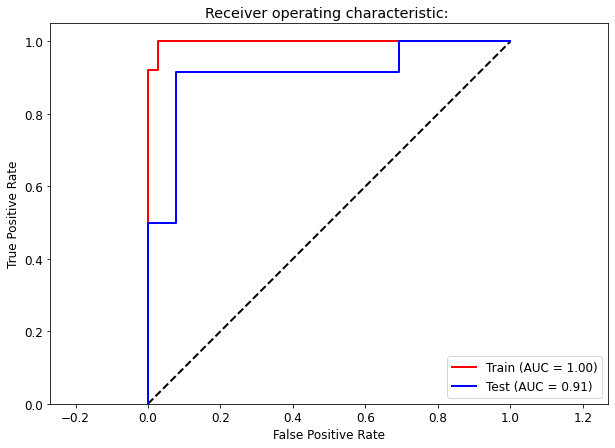

In [22]:
from imp import reload
import plotting
reload(plotting)
from plotting import rocCurvePlot

f=rocCurvePlot(dataTrain=dataTrain,dataTest=dataTest)

# 4) Lift

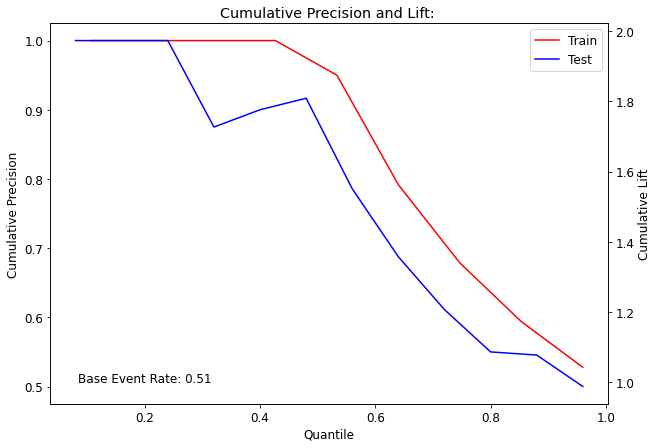

In [23]:
from imp import reload
import plotting
reload(plotting)
from plotting import liftCurvePlot

f=liftCurvePlot(dataTrain=dataTrain,dataTest=dataTest,noBins=10)
